# **SOLAR POWER REGRESSION**






**1.Loading the data set**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('solarpowergeneration.csv')

# Display the first few rows and dataset info
print(df.head())
print(df.info())


   distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   

   average-pressure-(period)  power-generated  
0                      29.82                0  
1                      29.85                0  
2                      29.89    

In [3]:
print(df.shape)

(2920, 10)


In [4]:
print(df.columns)

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')


**2. Checking for Missing Values**

In [5]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in 'average-wind-speed-(period)' with the median value using update()
df.update(df['average-wind-speed-(period)'].fillna(df['average-wind-speed-(period)'].median()))


distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64


In [6]:
# Summary statistics for numeric columns
print(df.describe())

       distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2920.000000   
mean      1.987671     9.557705    73.513699                    10.128767   
std       1.411978     1.383884    15.077139                     7.260333   
min       0.0000

**.Visualizing Data Distributions**

 Histograms

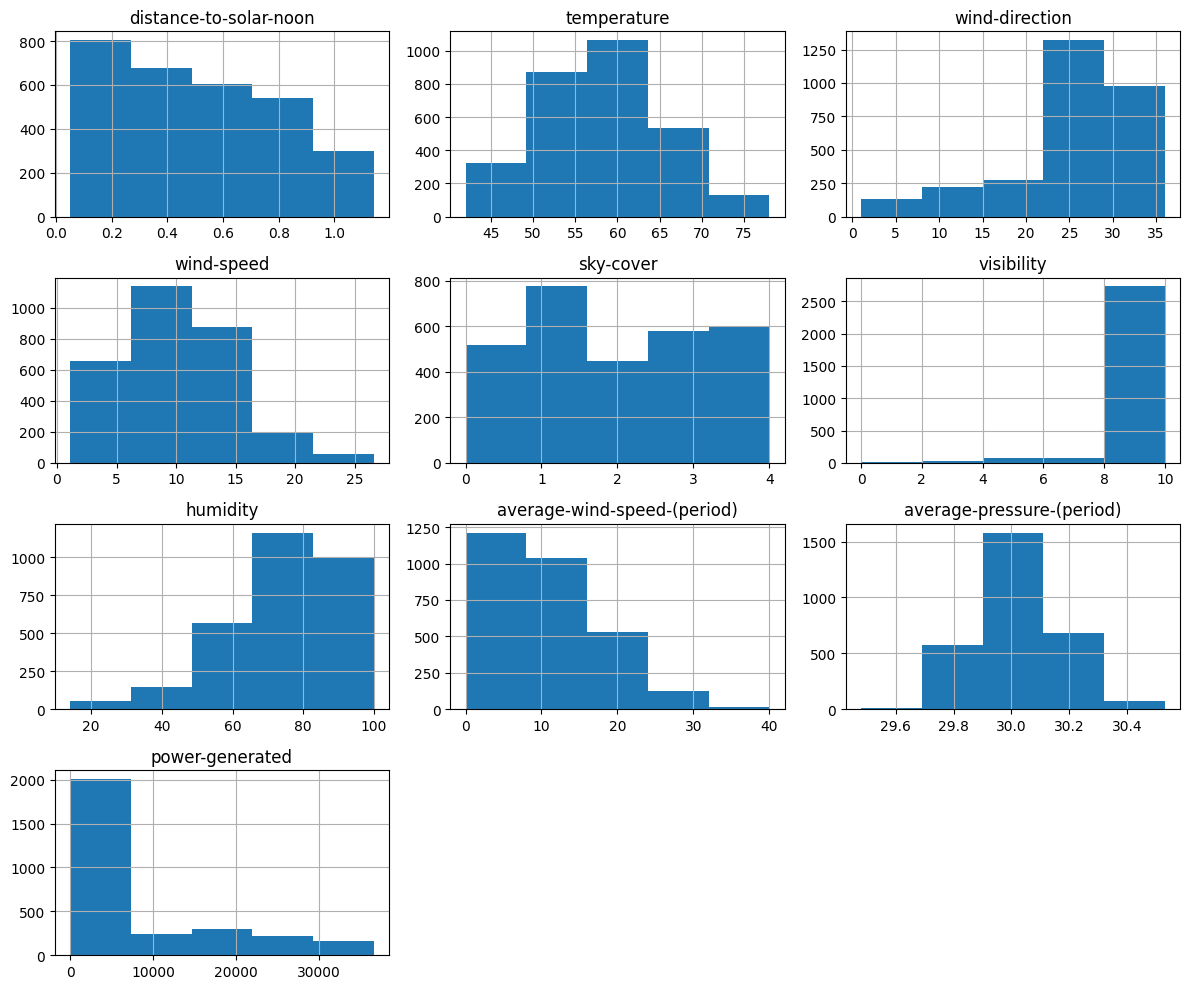

In [7]:
import matplotlib.pyplot as plt

# Histogram for numerical columns
df.hist(figsize=(12, 10), bins=5)
plt.tight_layout()
plt.show()


 Density Plots

 (smoothed version of a histogram)

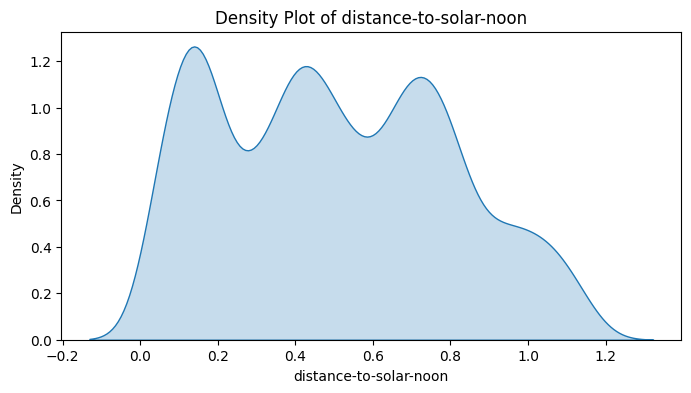

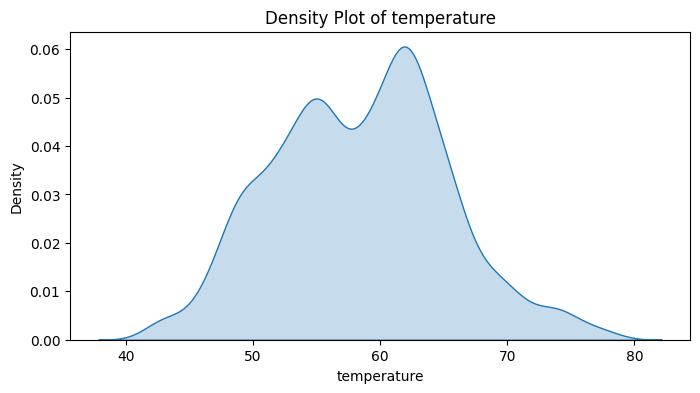

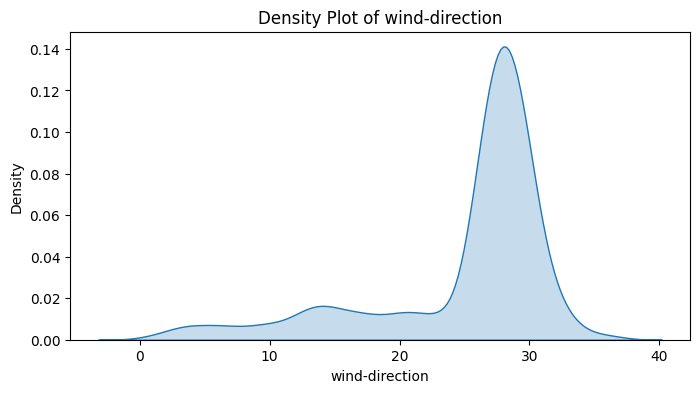

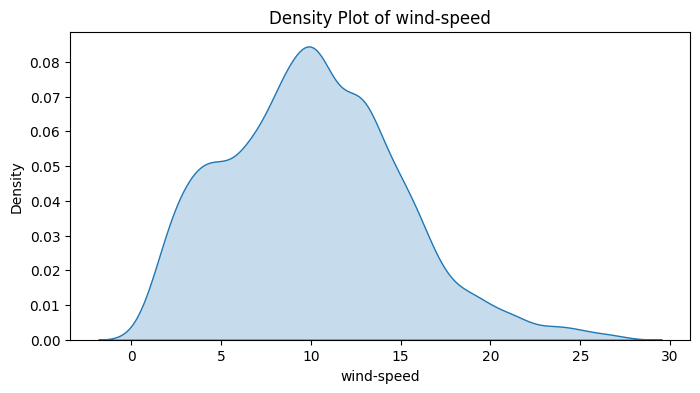

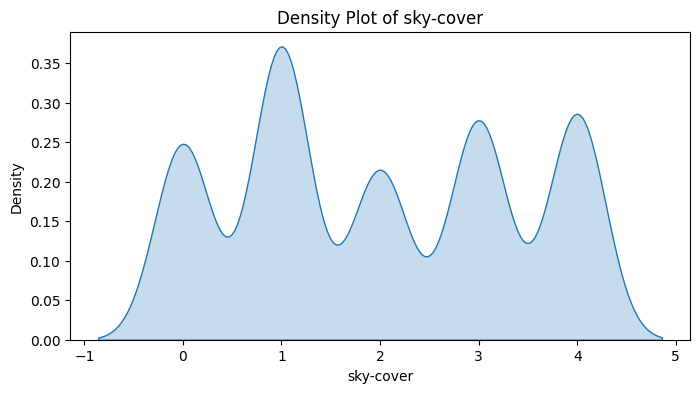

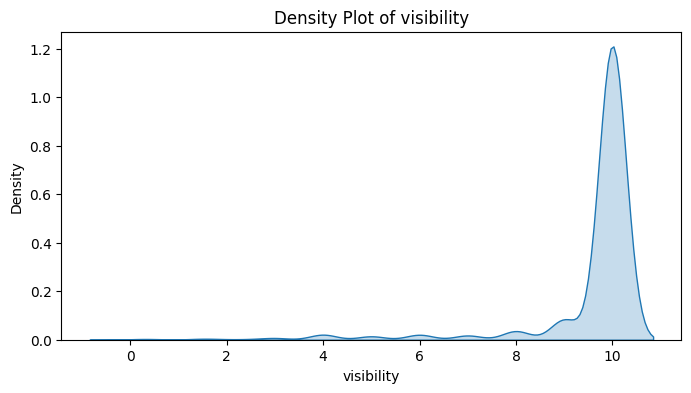

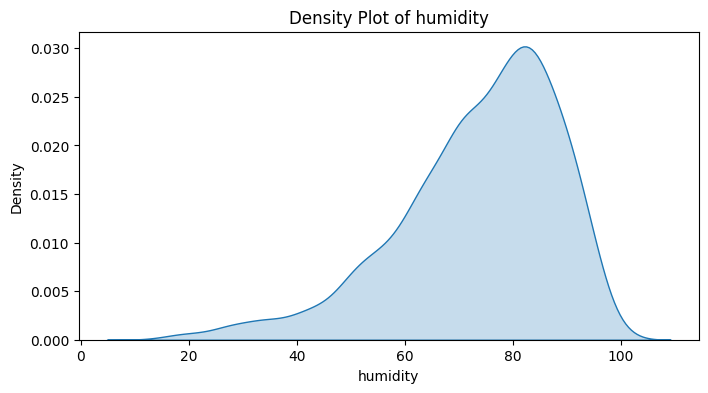

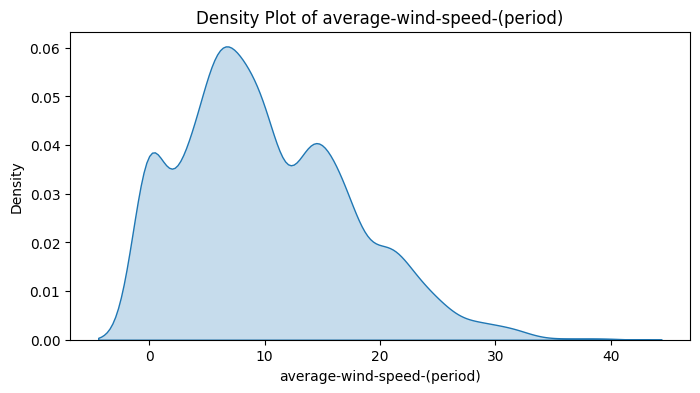

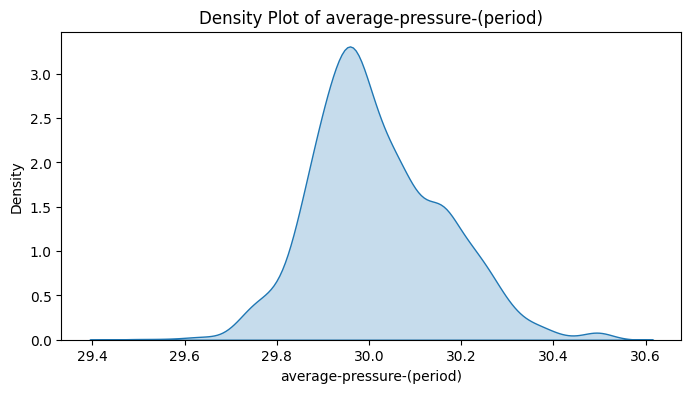

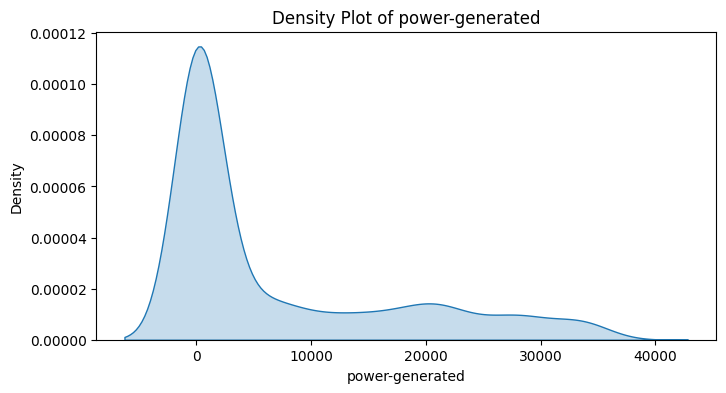

In [8]:
import seaborn as sns

# Density plot for numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], fill=True)
    plt.title(f"Density Plot of {col}")
    plt.show()


**Correlation Analysis**

 1.Heatmap

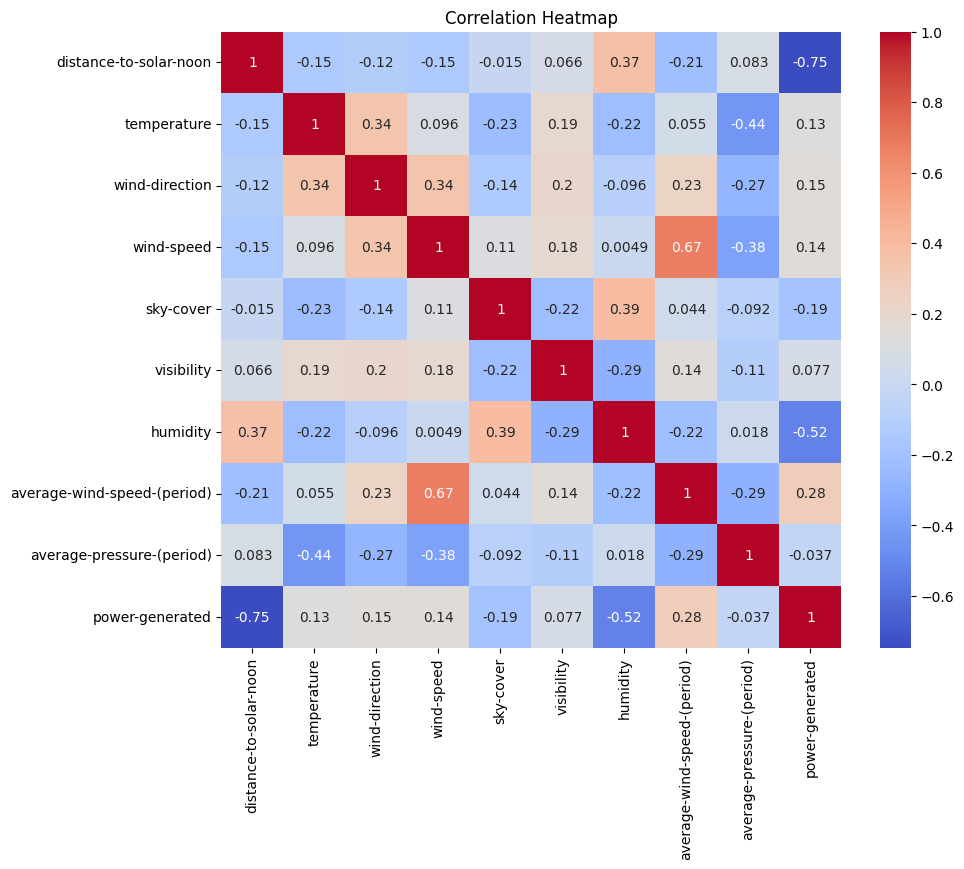

In [9]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


 Pairplot

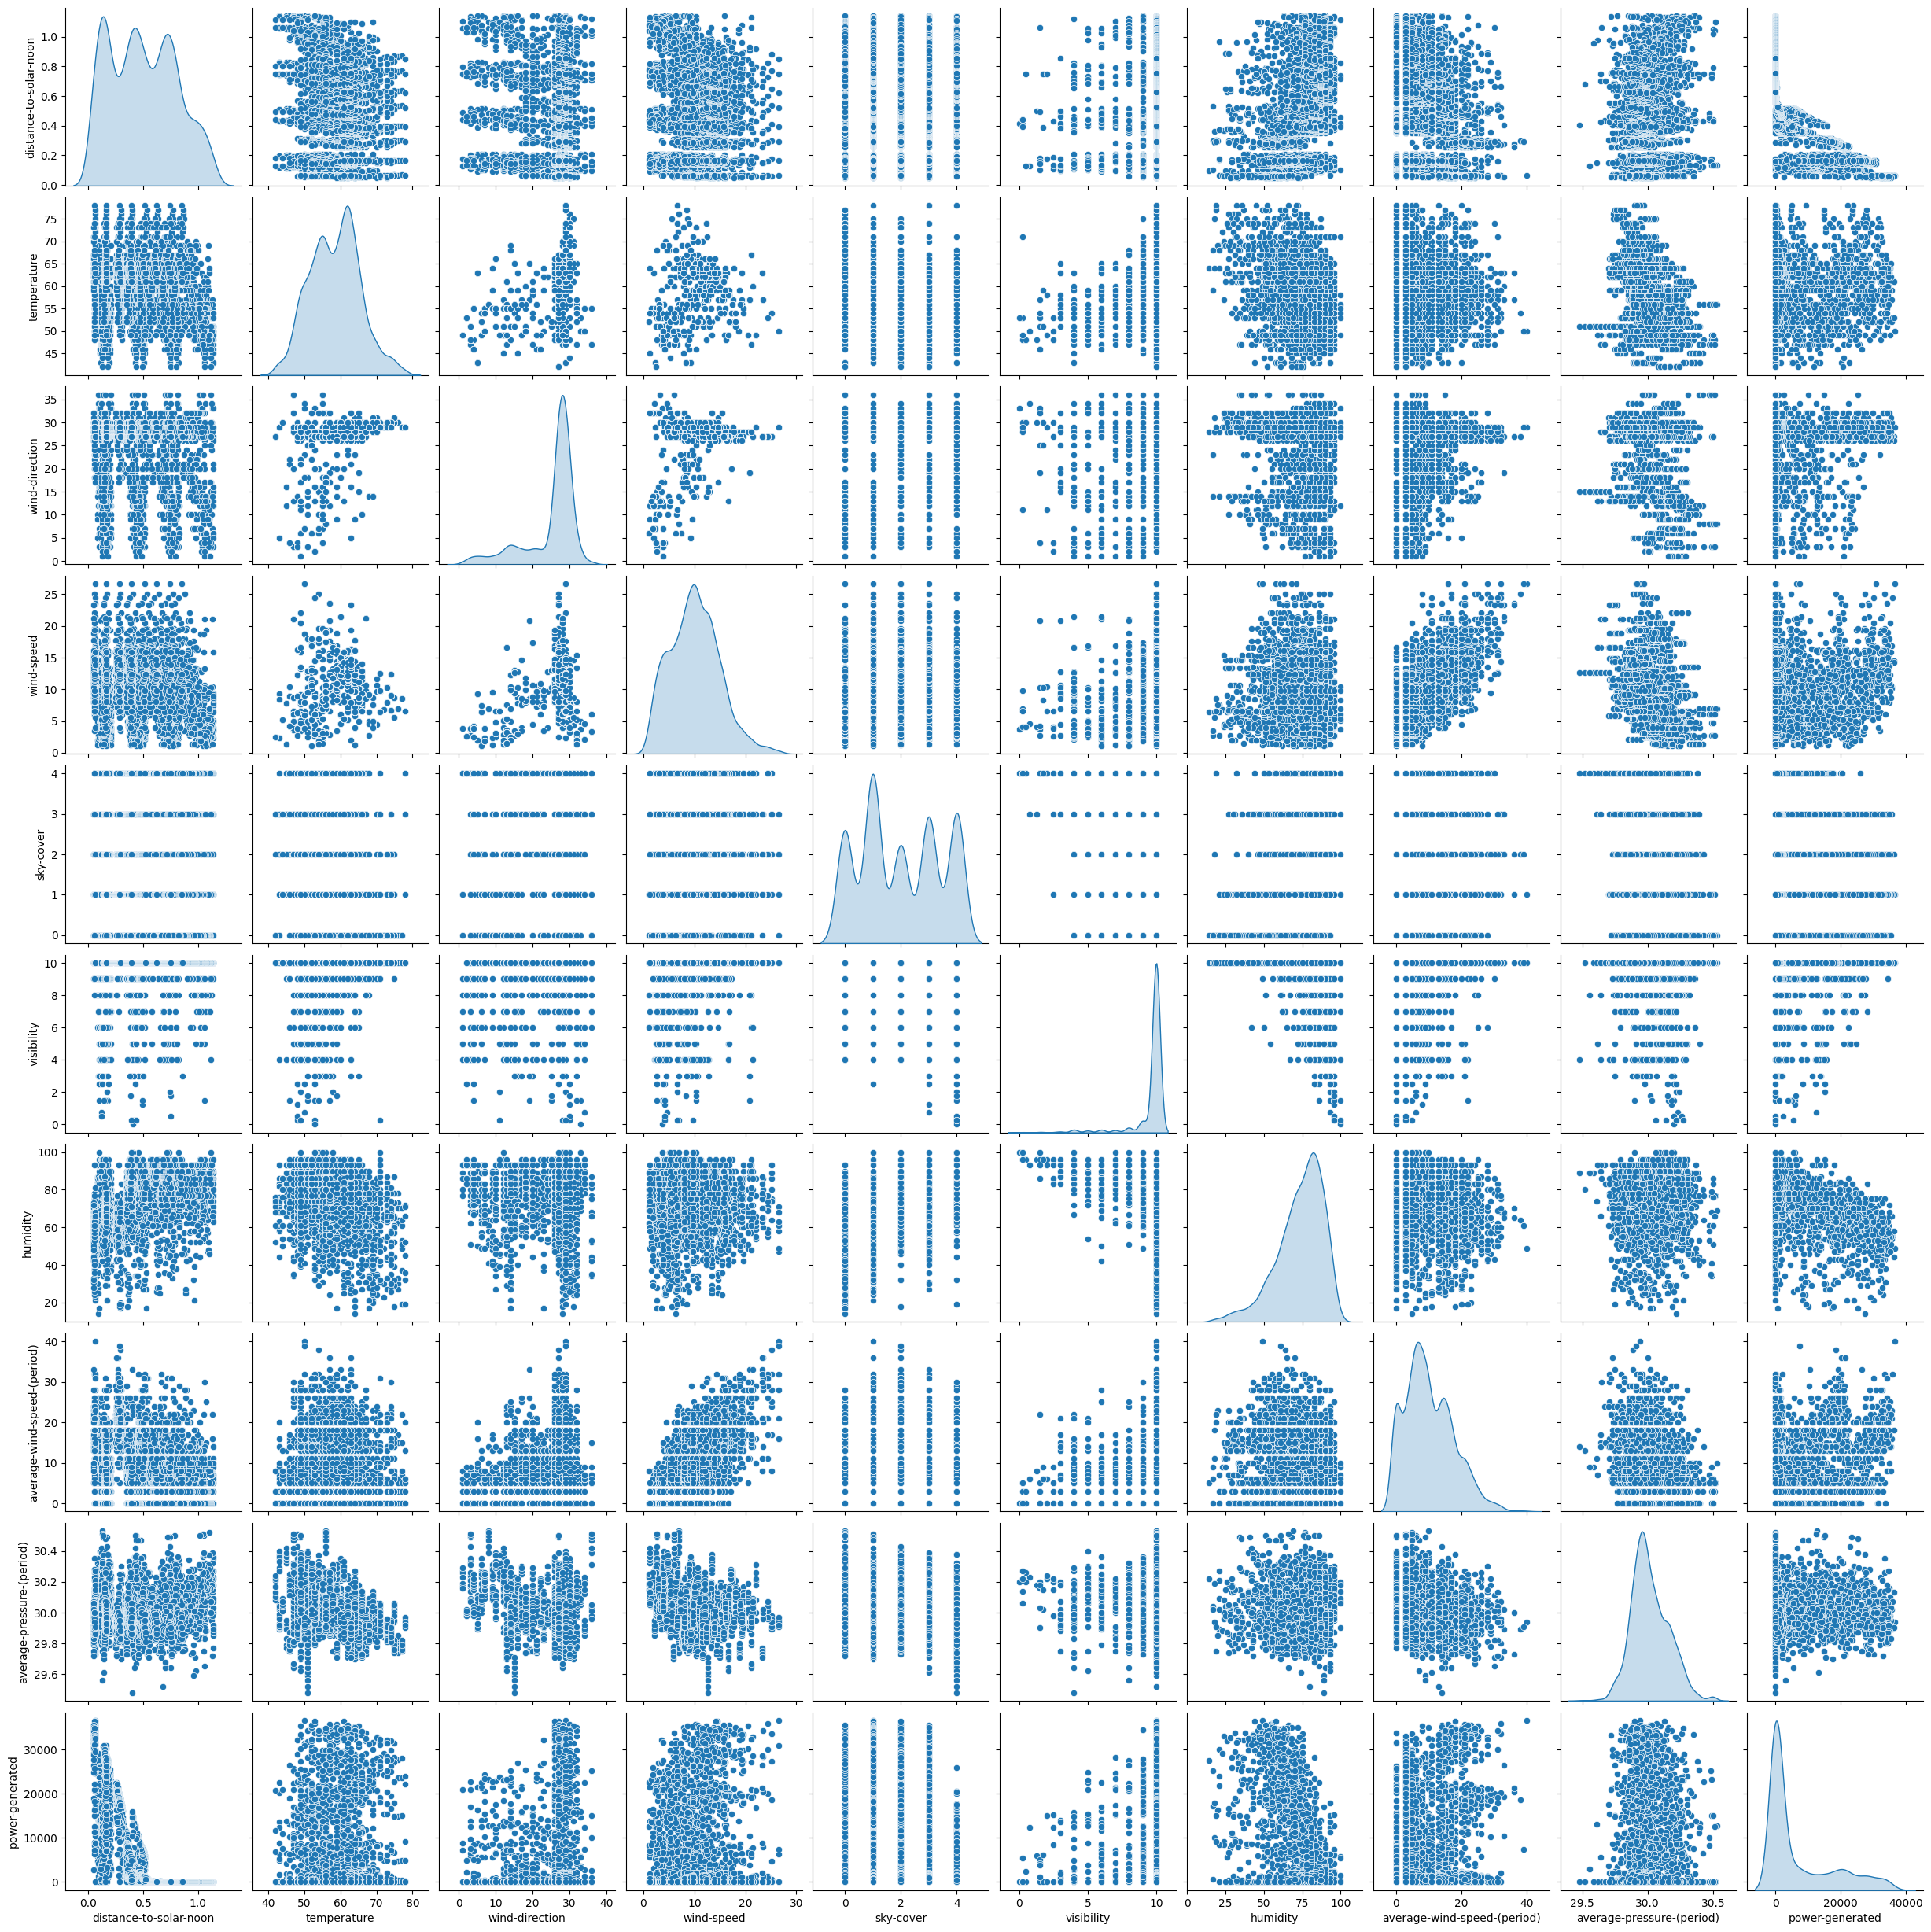

In [10]:
# Pairplot for relationships
sns.pairplot(df, diag_kind="kde")
plt.show()


**Outlier Detection**

 1.Box Plots


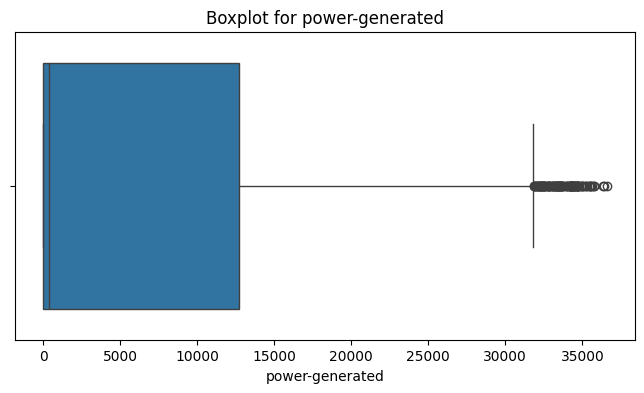

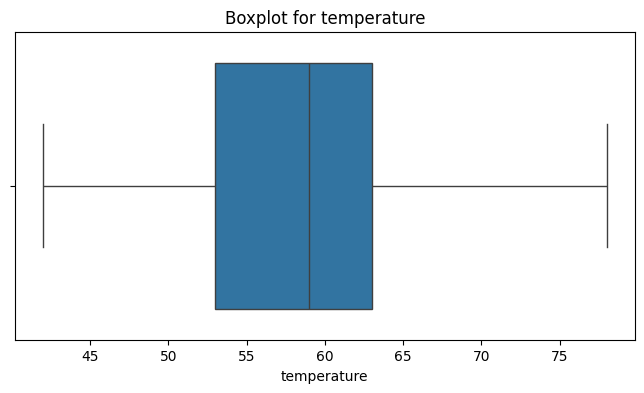

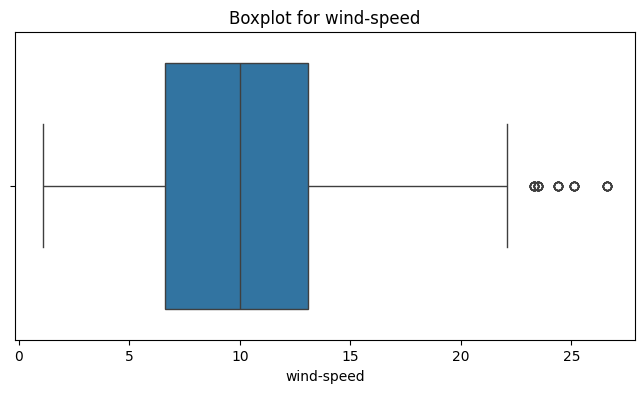

In [11]:
# Box plots for selected numerical columns
for col in ['power-generated', 'temperature', 'wind-speed']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


2. Violin Plots

<ipython-input-12-96ac63247357>:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=df['power-generated'], scale="width")


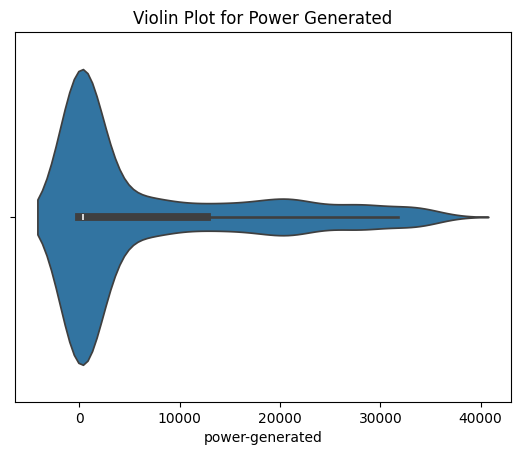

In [12]:
sns.violinplot(x=df['power-generated'], scale="width")
plt.title("Violin Plot for Power Generated")
plt.show()

**Feature Selection**

Use Isolation Forest to Remove Outliers



In [13]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(df)

# Filter the dataset to remove outliers
solar_data_cleaned = df[outliers == 1]

# Display the cleaned dataset shape
print(solar_data_cleaned.shape) #showing the number of rows and columns in the cleaned dataset.


(2890, 10)


**Visualizing Relationships**
1. Scatter Plots

Graphical representation using data points

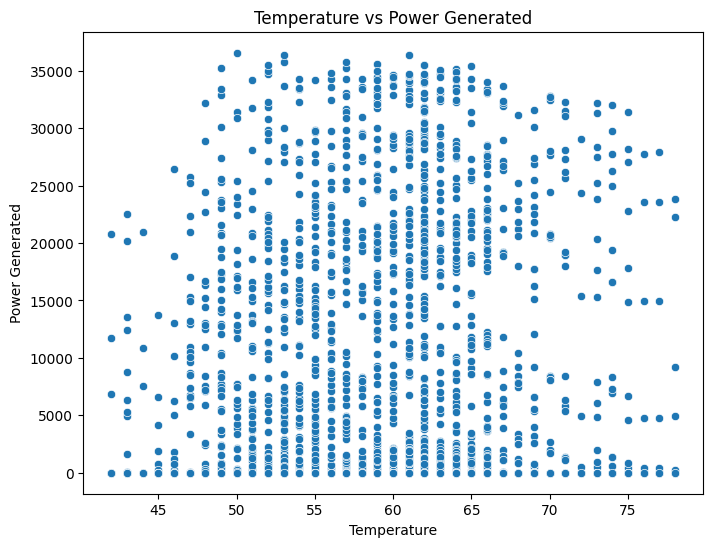

In [14]:
# Scatter plot for temperature vs power generated
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['temperature'], y=df['power-generated'])
plt.title("Temperature vs Power Generated")
plt.xlabel("Temperature")
plt.ylabel("Power Generated")
plt.show()


2. Bar Plots



The code calculates the average (mean) of 'power-generated' for each unique value in the 'sky-cover' column, groups the data by 'sky-cover', and then resets the index to return a new DataFrame (avg_power) with two columns: 'sky-cover' and the corresponding average power.








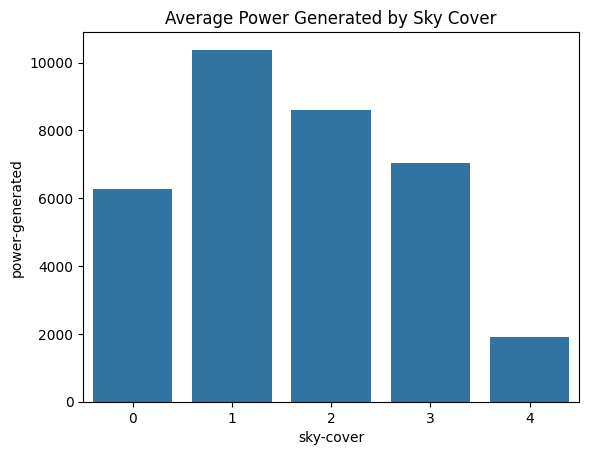

In [15]:
# Bar plot for average power generated per sky cover level
avg_power = df.groupby('sky-cover')['power-generated'].mean().reset_index() #The code calculates the average (mean) of 'power-generated' for each unique value in the 'sky-cover' column, groups the data by 'sky-cover', and then resets the index to return a new DataFrame (avg_power) with two columns: 'sky-cover' and the corresponding average power.
sns.barplot(x='sky-cover', y='power-generated', data=avg_power)
plt.title("Average Power Generated by Sky Cover")
plt.show()


3. Line Plots


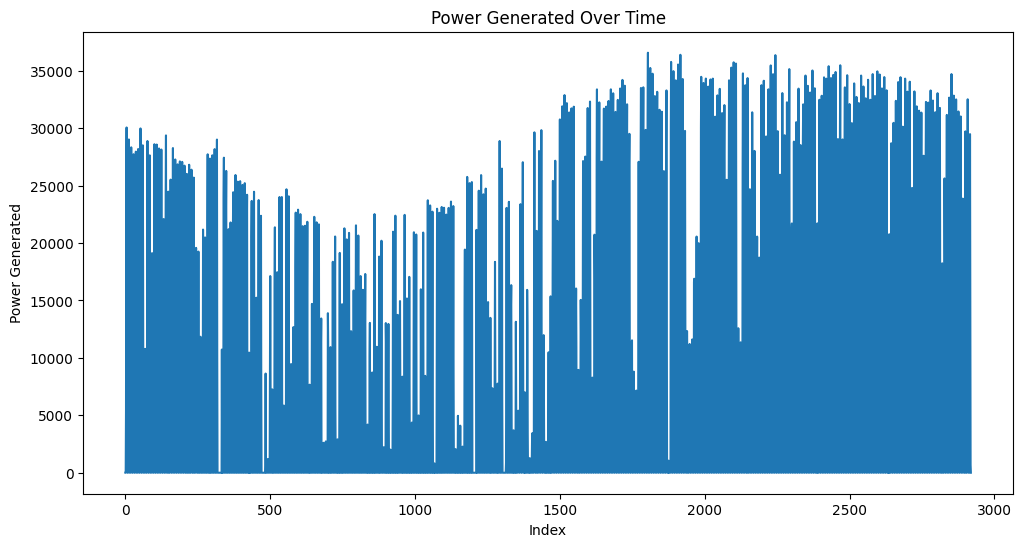

In [16]:
# Assuming the data has a time column
# Line plot for power generated
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['power-generated'])
plt.title("Power Generated Over Time")
plt.xlabel("Index")
plt.ylabel("Power Generated")
plt.show()


In [17]:
print(df.head())


   distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   

   average-pressure-(period)  power-generated  
0                      29.82                0  
1                      29.85                0  
2                      29.89    

**Feature Selection**

Use Isolation Forest to Remove Outliers

In [18]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(df)

# Filter the dataset to remove outliers
solar_data_cleaned = df[outliers == 1]

# Display the cleaned dataset shape
print(solar_data_cleaned.shape) #showing the number of rows and columns in the cleaned dataset.


(2890, 10)


In [19]:
!pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


**Correlation matrix**

In [20]:

# Calculate Correlation Matrix
correlation_matrix = df.corr()

# Display the Correlation Matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                             distance-to-solar-noon  temperature  \
distance-to-solar-noon                     1.000000    -0.145207   
temperature                               -0.145207     1.000000   
wind-direction                            -0.118010     0.342146   
wind-speed                                -0.145073     0.096267   
sky-cover                                 -0.015184    -0.230672   
visibility                                 0.065807     0.194110   
humidity                                   0.368964    -0.221463   
average-wind-speed-(period)               -0.214869     0.054556   
average-pressure-(period)                  0.082505    -0.435723   
power-generated                           -0.746681     0.132193   

                             wind-direction  wind-speed  sky-cover  \
distance-to-solar-noon            -0.118010   -0.145073  -0.015184   
temperature                        0.342146    0.096267  -0.230672   
wind-direction      

**MODEL BUILDING**

In [21]:
!pip install xgboost

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [23]:
X = solar_data_cleaned.drop(['power-generated'], axis=1)  # Features
y = solar_data_cleaned['power-generated']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Linear Regression**

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"R-squared: {r2_lr:.4f}")


Linear Regression:
Mean Squared Error: 37556545.8036
R-squared: 0.6166


**Random Forest Regressor**

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor:")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")



Random Forest Regressor:
Mean Squared Error: 10371764.9690
R-squared: 0.8941


**Gradient Boosting Regressor**

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor:")
print(f"Mean Squared Error: {mse_gb:.4f}")
print(f"R-squared: {r2_gb:.4f}")



Gradient Boosting Regressor:
Mean Squared Error: 9841996.0109
R-squared: 0.8995


**4. Support Vector Regressor (SVR)**

In [27]:
from sklearn.svm import SVR

# Support Vector Regressor
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regressor:")
print(f"Mean Squared Error: {mse_svr:.4f}")
print(f"R-squared: {r2_svr:.4f}")



Support Vector Regressor:
Mean Squared Error: 133396529.1896
R-squared: -0.3618


**XGBoost Regressor**

In [28]:
import xgboost as xgb

# XGBoost Regressor
xgboost = xgb.XGBRegressor(random_state=42)
xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regressor:")
print(f"Mean Squared Error: {mse_xgb:.4f}")
print(f"R-squared: {r2_xgb:.4f}")



XGBoost Regressor:
Mean Squared Error: 9989690.0000
R-squared: 0.8980


**BEST MODEL**

**Gradient Booster Regressor** is the Best Model

* Highest
𝑅
2: Its
𝑅
2
 score of 89.95(~90%) suggests it explains  90%  of the variance in the target variable, the highest among the models.

Conclusion:
 Gradient Booster Regressor is the best model for this dataset. It achieves the best balance between prediction accuracy (low MSE) and explanatory power (
𝑅
2
).








Predictive Score

In [29]:
import pickle
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Assuming solar_data_cleaned is already available
X = solar_data_cleaned.drop(['power-generated'], axis=1)  # Features
y = solar_data_cleaned['power-generated']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)

# Evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor:")
print(f"Mean Squared Error: {mse_gb:.4f}")
print(f"R-squared: {r2_gb:.4f}")

# Predictive score for the model
predictive_score = gb.score(X_test, y_test)
print(f"Predictive Score: {predictive_score:.4f}")




Gradient Boosting Regressor:
Mean Squared Error: 9841996.0109
R-squared: 0.8995
Predictive Score: 0.8995


Next Steps:

*1.Feature Importance*

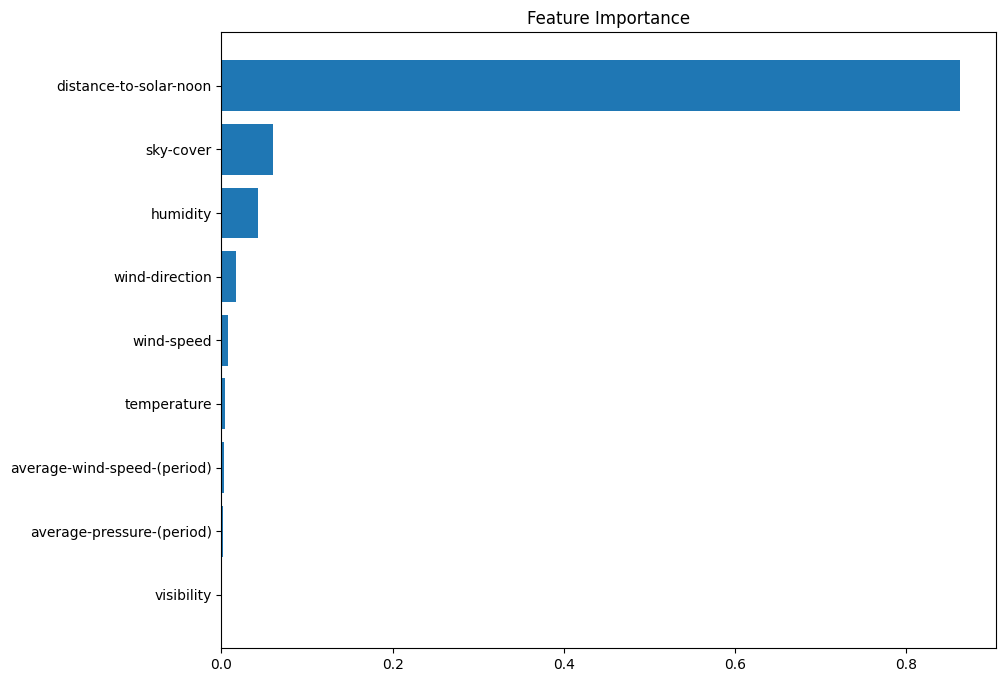

In [30]:
import matplotlib.pyplot as plt

# Feature importance
importances = gb.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.title('Feature Importance')
plt.show()


power - generated feature contributes most to the model's predictions



*2.Cross-Validation*

 (To confirm robustness of model)

In [31]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gb, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-cv_scores.mean():.4f}")


Cross-Validation MSE: 11725003.4888


Cross-Validation MSE(11725003.4888) < Test MSE ( 2522.7409.):

The model performs slightly better during cross-validation compared to the test dataset.

*3.Save the model*

In [32]:
# Save the model as a pickle file
model_filename = 'gradient_boosting_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(gb, file)

print(f"Model saved to {model_filename}")


Model saved to gradient_boosting_model.pkl


In [33]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.6.1


In [36]:
import joblib

# Assuming 'gb' is your trained Gradient Boosting Regressor model
model = gb  # Assign the trained model to 'model'

# Save the model
joblib.dump(model, 'gradient_boosting_model2.pkl')

# Load the model
loaded_model = joblib.load('gradient_boosting_model2.pkl') # Assign the loaded model to a different variable to avoid confusion